In [1]:
import numpy as np 
import seaborn as sb
from sklearn.datasets import make_moons 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
a= make_moons(n_samples= 1000 , noise= 0.2 , random_state=100)

In [3]:
x = np.array(a[0])
y = np.array(a[1])
x_ = x[:,0]
print(x_.shape , y.shape , x.shape)

(1000,) (1000,) (1000, 2)


In [4]:
x1 = x[:,1]
x1.shape

(1000,)

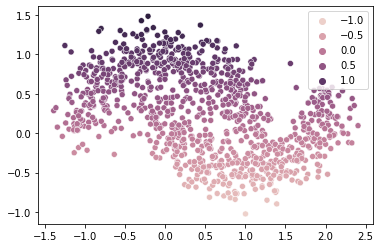

In [5]:
c = sb.scatterplot(x = x_ , y = x1 , hue = x1)

# Splitting Data into Test and Train

In [6]:
split = 0.9
xrownumber = x.shape[0]
yrownumber = y.shape[0]
xdatum = int(split * xrownumber)
ydatum = int(split * yrownumber)

In [7]:
x_train = x[0:xdatum , :]
x_test = x[xdatum: , :]
x_test.shape

(100, 2)

In [8]:
y_train = y[0:ydatum]
y_test = y[ydatum:, ]
y_test.shape

(100,)

# Structure of Neural Net

In [9]:
neuralnet = [
    {"input_layer" : 2 , "output_layer" : 25 , "activation" : "relu"} ,
    {"input_layer" : 25 , "output_layer" : 50 , "activation" : "relu"} ,
    {"input_layer" : 50 , "output_layer" : 50 , "activation" : "relu"} ,
    {"input_layer" : 50 , "output_layer" : 25 , "activation" : "relu"} ,
    {"input_layer" : 25 , "output_layer" : 1 , "activation" : "sigmoid"} ,
]   

In [10]:
def first_layer(neuralnet , seed = 42):
    np.random.seed(seed)
    weights_baise = {}
    
    for idx , layer in enumerate(neuralnet):
        layer_idx = idx + 1
        input_size = layer["input_layer"]
        output_size = layer["output_layer"]
        weights_baise["W" + str(layer_idx)] = np.random.randn(output_size , input_size) * 0.1
        weights_baise["b" + str(layer_idx)] = np.random.randn(output_size , 1) * 0.1
    
    return weights_baise


In [11]:
first_layer(neuralnet, 42)['W1']

array([[ 0.04967142, -0.01382643],
       [ 0.06476885,  0.15230299],
       [-0.02341534, -0.0234137 ],
       [ 0.15792128,  0.07674347],
       [-0.04694744,  0.054256  ],
       [-0.04634177, -0.04657298],
       [ 0.02419623, -0.19132802],
       [-0.17249178, -0.05622875],
       [-0.10128311,  0.03142473],
       [-0.09080241, -0.14123037],
       [ 0.14656488, -0.02257763],
       [ 0.00675282, -0.14247482],
       [-0.05443827,  0.01109226],
       [-0.11509936,  0.0375698 ],
       [-0.06006387, -0.02916937],
       [-0.06017066,  0.18522782],
       [-0.00134972, -0.10577109],
       [ 0.08225449, -0.12208436],
       [ 0.02088636, -0.19596701],
       [-0.1328186 ,  0.01968612],
       [ 0.07384666,  0.01713683],
       [-0.01156483, -0.03011037],
       [-0.1478522 , -0.07198442],
       [-0.04606388,  0.10571222],
       [ 0.03436183, -0.17630402]])

# Activation Function

In [12]:
def sigmoid (Z):
    return 1 / ( 1 + np.exp( - Z))

def sigmoid_backprop(dA , Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu(Z):
    return np.maximum(0 , Z)

def relu_backprop(dA , Z):
    dZ = np.array(dA , copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

In [13]:
def single_forward_layer(A_prev , W_curr , b_curr , activation = "relu"):
    Z_curr = np.dot(W_curr , A_prev ) + b_curr
    
    if activation is "relu":
        activation_func = relu
    elif activation is "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception("activation function not defined")
    
    return activation_func(Z_curr) , Z_curr

# Forward Propagation

In [14]:
def full_forward_layer(neuralnet , weights_baise , x):
    memory = {}
    A_curr = x
    
    for idx , layer in enumerate(neuralnet):
        layer_idx = idx + 1
        A_prev = A_curr
        activation_func = layer["activation"]
        W_curr =  weights_baise["W" + str(layer_idx)] 
        b_curr =  weights_baise["b" + str(layer_idx)]
        A_curr , Z_curr = single_forward_layer(A_prev , W_curr , b_curr , activation_func)
        
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
    
    return memory , A_curr

In [15]:
weights_baise_ = first_layer(neuralnet , 42)

In [16]:
list(full_forward_layer(neuralnet , weights_baise_ , x_train.T))[0]["A0"]

array([[ 2.24907069e-05, -5.59037377e-02,  2.40944879e-02, ...,
         4.58137280e-01,  5.42091813e-01,  1.46818143e+00],
       [ 1.07275825e+00,  4.25241282e-01,  4.08065802e-01, ...,
         1.04163608e+00,  3.79542640e-01, -2.00995499e-01]])

In [17]:
memory , y_hat_train =   full_forward_layer(neuralnet , weights_baise_ , x_train.T)

# Loss Function

In [18]:
def cost_value(y , y_hat):
    m = y_hat.shape[1]
    cost = - 1 / m * (np.dot(y , np.log(y_hat).T) + np.dot(1 - y , np.log(1 - y_hat).T))
    return np.squeeze(cost)

def probtoclass(prob):
    prob_ = np.copy(prob)
    prob_[prob_ > 0.5] = 1
    prob_[prob_ <= 0.5] = 0
    return prob_

def accuracy_value(y , y_hat):
    y_hat_ = probtoclass(y_hat)
    return (y_hat_ == y).all(axis = 0).mean()
    
    


In [19]:
#np.transpose(y_train.reshape((y_train.shape[0] , 1)))

CV = cost_value(y_train.reshape((y_train.shape[0] , 1)).T , y_hat_train )
AV = accuracy_value(y_train.reshape((y_train.shape[0] , 1)).T , y_hat_train)

print(CV , AV)

0.6942378762606295 0.5033333333333333


In [20]:
def single_backprop(dA_curr , Z_curr , A_prev , W_curr , b_curr , activation = "relu"):
    m = A_prev.shape[1]
    
    if activation is "relu":
        activation_func = relu_backprop
    elif activation is "sigmoid":
        activation_func = sigmoid_backprop
    else:
        raise Exception("activation function not defined")
        
    dZ_curr = activation_func(dA_curr , Z_curr)
    dW_curr = np.dot(dZ_curr , A_prev.T) / m
    db_curr = np.sum(dZ_curr , axis = 1 , keepdims= True ) / m
    dA_prev = np.dot(W_curr.T , dZ_curr)
    
    return dA_prev , dW_curr , db_curr 

# Back Propagation

In [21]:
def full_backprop(y , y_hat , memory , weights_baise, neuralnet ):
    grad_value = {}
    
    m = y.shape[1]
    y = y.reshape(y_hat.shape)
    
    dA_prev = - (np.divide(y , y_hat) - np.divide(1- y , 1 - y_hat));
    
    for idx , layer in reversed(list(enumerate(neuralnet))):
        layer_idx = idx + 1
        activation_func = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(idx)]
        Z_curr = memory["Z" + str(layer_idx)]
        
        W_curr = weights_baise["W" + str(layer_idx)]
        b_curr =  weights_baise["b" + str(layer_idx)]
        
        dA_prev , dW_curr , db_curr = single_backprop(dA_curr , Z_curr , A_prev , W_curr , b_curr , activation_func)
        
        grad_value["dW" + str(layer_idx)] = dW_curr
        grad_value["db" + str(layer_idx)] = db_curr
    
    
    return grad_value

In [22]:
#y_train.reshape((y_train.shape[0] , 1)).T , y_hat_train
grad_value = full_backprop(y_train.reshape((y_train.shape[0] , 1)) , y_hat_train , memory , weights_baise_ , neuralnet)
grad_value['dW5']

array([[-0.00980419,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00167025,
         0.        ,  0.        , -0.00075175,  0.        , -0.00137934,
        -0.00187255,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.00315215,  0.        ,  0.        , -0.00064571]])

# Updating Gradient descent

In [23]:
def update(neuralnet, learning_rate , grad_value , weights_baise):
    
    for layer_idx , layer in enumerate(neuralnet , 1):
    
        weights_baise["W" + str(layer_idx)] -= learning_rate *  grad_value["dW" + str(layer_idx)]
        weights_baise["b" + str(layer_idx)] -= learning_rate *  grad_value["db" + str(layer_idx)]
    
    return weights_baise
    

In [24]:

weights_baise__ = update(neuralnet , 0.01 , grad_value , weights_baise_)
weights_baise__['W1']

array([[ 0.04966903, -0.01382178],
       [ 0.0647609 ,  0.15231955],
       [-0.02341534, -0.0234137 ],
       [ 0.15791021,  0.0767554 ],
       [-0.04695994,  0.05426848],
       [-0.04634086, -0.04657175],
       [ 0.02420934, -0.19133387],
       [-0.17249013, -0.0562298 ],
       [-0.10129559,  0.03144528],
       [-0.09080369, -0.14122942],
       [ 0.14653054, -0.022556  ],
       [ 0.00675108, -0.14247413],
       [-0.05443827,  0.01109226],
       [-0.11509871,  0.03756952],
       [-0.06006776, -0.0291601 ],
       [-0.06017066,  0.18522944],
       [-0.00135021, -0.10577126],
       [ 0.08225202, -0.122082  ],
       [ 0.02089819, -0.19597067],
       [-0.13281903,  0.01968672],
       [ 0.07383717,  0.01713912],
       [-0.01155832, -0.03011126],
       [-0.14785063, -0.07198537],
       [-0.04607521,  0.10572121],
       [ 0.03436183, -0.17630402]])

# Training the Model

In [43]:
def train(x , y , learning_rate  , epoch , neuralnet , callback = None , lossfunction = False ):
    cost_value_history = []
    accuracy_value_history = []
    lossfunc = []
    weights_baise = first_layer(neuralnet , 42)
    
    
    for i in range(epoch):
        
        
    
        memory , y_hat = full_forward_layer(neuralnet , weights_baise , x)
        
        cost = cost_value(y , y_hat)
        cost_value_history.append(cost)
        accuracy = accuracy_value(y , y_hat)
        accuracy_value_history.append(accuracy)
        
    
        grad_value = full_backprop(y , y_hat , memory , weights_baise, neuralnet )
    
        weights_baise = update(neuralnet, learning_rate , grad_value , weights_baise)
    
        if (i % 100 == 0):
        
            if(lossfunction is not None):
                lossfunc.append([i , cost , accuracy])
            if(callback is not None):
                callback(i , weights_baise)
    
    
    return weights_baise , lossfunc

In [44]:
weights_baise , lossfunc = train(x_train.T , np.transpose(y_train.reshape((y_train.shape[0] , 1))) , 0.01  , 10000 , neuralnet , callback = callbacks , lossfunction = lossfunction )


# Using weights and baise with Test data

In [32]:
_, Y_test_hat = full_forward_layer(neuralnet  , weights_baise , np.transpose(x_test))
Y_test_hat

array([[9.81257226e-01, 4.96253370e-01, 6.92602211e-01, 1.41113269e-02,
        1.23108459e-03, 9.73888541e-01, 6.31335015e-02, 9.99267474e-01,
        9.95153132e-01, 2.42215666e-03, 9.80416966e-03, 2.80466488e-03,
        6.38426038e-04, 4.20508475e-02, 5.97875515e-02, 9.82777485e-01,
        9.77368354e-01, 3.89870433e-04, 2.16704211e-02, 5.38628504e-04,
        4.52664527e-03, 9.46115069e-01, 6.77421198e-02, 1.09784363e-01,
        9.99535642e-01, 9.27197001e-01, 9.81322403e-01, 1.26311950e-03,
        9.94756409e-01, 1.42906019e-03, 4.05910819e-03, 2.70537183e-03,
        1.36905478e-03, 8.23714267e-01, 9.96589622e-01, 9.98672206e-01,
        4.62069357e-03, 9.95761340e-01, 1.06569564e-02, 1.39249118e-03,
        9.57596981e-01, 9.45745432e-04, 6.67704856e-03, 8.95660772e-03,
        1.02207862e-03, 7.75179417e-04, 9.81286249e-01, 9.84742225e-01,
        8.12499018e-01, 2.41611354e-04, 9.97834485e-01, 9.98950064e-01,
        9.92408539e-01, 2.76138981e-02, 9.98639019e-01, 7.787313

In [33]:
# Accuracy achieved on the test set
acc_test = accuracy_value( np.transpose(y_test.reshape((y_test.shape[0], 1))) , Y_test_hat )
print((acc_test))

0.98


In [34]:
a = np.array(lossfunc , copy = True )[:,0:2]
a.shape
#lossfunc

(200, 2)

# graph of loss function

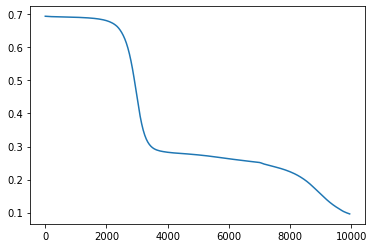

In [35]:
loss_function__ = plt.plot(a[:,0] , a[:,1])

In [27]:
def make_plot(X , Y, file_name=None, XX=None, YY=None, preds=None):

    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape))
        plt.contour(XX, YY, preds.reshape(XX.shape))
    plt.scatter(X[:, 0], X[:, 1])
    if(file_name):
        plt.savefig(file_name)
        plt.close()

# using numpy.mgrid to plot the values

In [28]:
location = "E:\\python folder\\images\\"
grid = np.mgrid[-1.5:2.5:100j,-1.5:2:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid

In [29]:
def callbacks(index , weights_baise):
    file_name = str(index//100)
    file_path = os.path.join(location, file_name)
    
    _ , prediction = full_forward_layer(neuralnet , weights_baise, np.transpose(grid_2d))
    prediction = prediction.reshape(prediction.shape[1], 1)
    make_plot(x_test,y_test , file_name=file_path, XX=XX, YY=YY, preds=prediction)
    
def lossfunction(index , cost , accuracy):
    
    return index , cost , accuracy

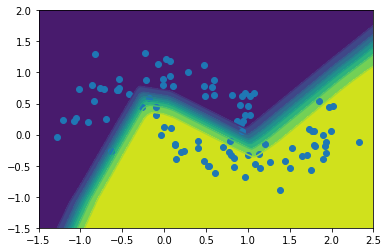

In [36]:
    _ , prediction_ = full_forward_layer(neuralnet , weights_baise, np.transpose(grid_2d))
    prediction_ = prediction_.reshape(prediction_.shape[1], 1)
    make_plot(x_test,y_test , file_name=None, XX=XX, YY=YY, preds=prediction_)
    
    

In [37]:
grid.shape

(2, 100, 100)

In [38]:
grid_2d.shape

(10000, 2)

In [39]:
prediction_.shape

(10000, 1)